# Segmentation

## Let’s get to work!

In [1]:
# general imports:
import os
import importlib
from torch import nn, cuda
from torch import optim
import torch
import numpy as np

In [2]:
# my imports (reload all modules):
from data.dataset import load_data_deep_crack
from models.unet import UNet
from training.metrics import DiceLoss
from training.train import train
from training.train import validate
from training.train import test2
import data.dataset
import models.unet
import training.metrics
import training.train
importlib.reload(data.dataset)
importlib.reload(models.unet)
importlib.reload(training.metrics)
importlib.reload(training.train)

<module 'training.train' from 'd:\\01_adatmat_elte\\03_thesis\\concrete_crack_thesis\\src\\training\\train.py'>

In [3]:
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
print(f'Number of visible CUDA devices: {cuda.device_count()}')
cuda.is_available()
# NOTE: when referring to a CUDA device, torch will only know about visible devices
#       so while currently we will be using gpu05
#       this will be device `cuda:0`

Number of visible CUDA devices: 1


True

#### Loading the data

In [4]:
data_source ='../../DeepCrack/dataset/DeepCrack'
train_image_dir = data_source + '/train_img'
train_mask_dir = data_source + '/train_lab'
test_image_dir = data_source + '/test_img'
test_mask_dir = data_source + '/test_lab'

In [5]:
train_dl, val_dl, train_dataset, val_dataset = load_data_deep_crack(train_image_dir, train_mask_dir, [0.8, 0.2], limit_im_nr=10)

This gives us 240 train and 60 validation samples.


With CPU: 4m 12s


With CUDA: 3m 6s

In [6]:
model = UNet(   img_channels = 3,
                mask_channels = 1,
                base_channel_size = 64)  
loss = DiceLoss()
optimizer = optim.Adam(params = model.parameters(), lr = 1e-4)
dice_idcs, epoch_dice_idcs, val_dice_idcs, train_loss, val_loss = [], [], [], [], []
best_model_wts = {}

train(model, loss, optimizer, train_dl, val_dl, num_epochs = 100, accum_scale = 4, dice_idcs = dice_idcs, epoch_dice_idcs = epoch_dice_idcs, val_dice_idcs = val_dice_idcs, best_model_wts = best_model_wts, train_loss=train_loss, val_loss=val_loss)

d:\01_AdatMat_Elte\03_THESIS\concrete_crack_thesis\venv\Lib\site-packages\torch\nn\modules\conv.py:549: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\Convolution.cpp:1037.)
  return F.conv2d(


Train loss:  0.9462749163309733
Epoch  1 . finished.
Validation loss:  0.9514238039652506
Train loss:  0.9362311363220215
Epoch  2 . finished.
Validation loss:  0.9509123166402181
Train loss:  0.9163158734639486
Epoch  3 . finished.
Validation loss:  0.9499714374542236
Train loss:  0.897640069325765
Epoch  4 . finished.
Validation loss:  0.948431650797526
Train loss:  0.894902229309082
Epoch  5 . finished.
Validation loss:  0.9458479086558024
Train loss:  0.8846329053243002
Epoch  6 . finished.
Validation loss:  0.9416919549306234
Train loss:  0.8808431625366211
Epoch  7 . finished.
Validation loss:  0.9355552991231283
Train loss:  0.8808897336324056
Epoch  8 . finished.
Validation loss:  0.9270323117574056
Train loss:  0.8632009029388428
Epoch  9 . finished.
Validation loss:  0.9117446740468343
Train loss:  0.8717047373453776
Epoch  10 . finished.
Validation loss:  0.8952064514160156
Train loss:  0.8580505053202311
Epoch  11 . finished.
Validation loss:  0.8875184853871664
Train loss:

In [7]:
dice_idcs_np = np.array(dice_idcs)
epoch_dice_idcs_np = np.array(epoch_dice_idcs)
val_dice_idcs_np = np.array(val_dice_idcs)
train_loss_np = np.array(train_loss)
val_loss_np = np.array(val_loss)

In [8]:
torch.save(model.state_dict(), '../saved_models/unet_3/model_state.pth')
torch.save(best_model_wts, '../saved_models/unet_3/best_model_wts.pth')
np.save( '../saved_models/unet_3/dice_idcs.npy', dice_idcs_np)
np.save( '../saved_models/unet_3/epoch_dice_idcs.npy', epoch_dice_idcs_np)
np.save( '../saved_models/unet_3/val_dice_idcs.npy', val_dice_idcs_np)
np.save( '../saved_models/unet_3/train_loss.npy', train_loss_np)
np.save( '../saved_models/unet_3/val_loss.npy', val_loss_np)


In [37]:
model_saved = torch.load('./models/covidqu_unet_test', weights_only=False)

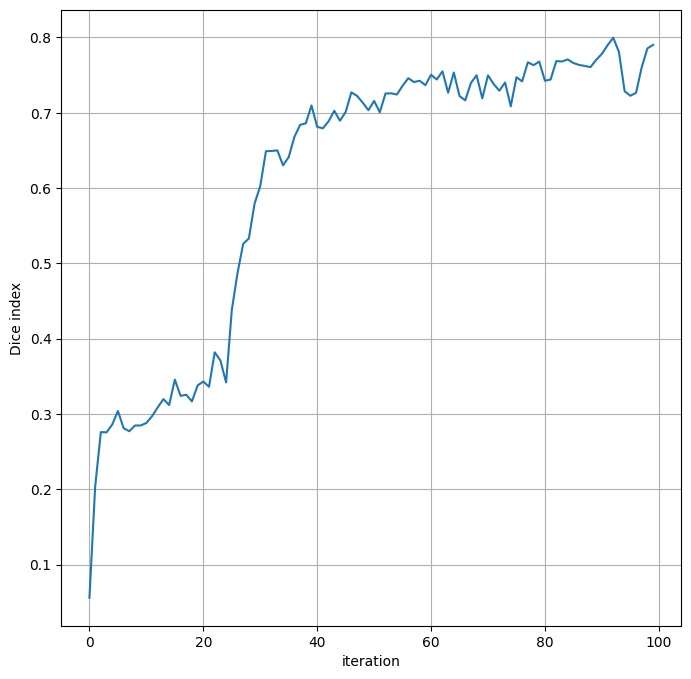

In [10]:
import matplotlib.pyplot as plt 

plt.figure(figsize = (8, 8))
plt.plot(dice_idcs)
plt.grid()

plt.xlabel('iteration')
plt.ylabel('Dice index')
plt.show()

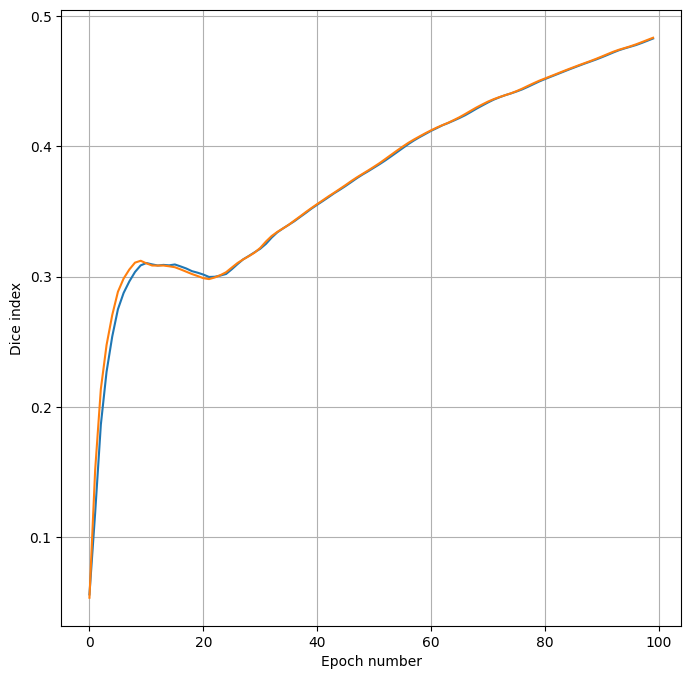

In [11]:
plt.figure(figsize = (8, 8))
plt.plot(epoch_dice_idcs_np)
plt.plot(val_dice_idcs_np)
plt.grid()

plt.xlabel('Epoch number')
plt.ylabel('Dice index')
plt.show()

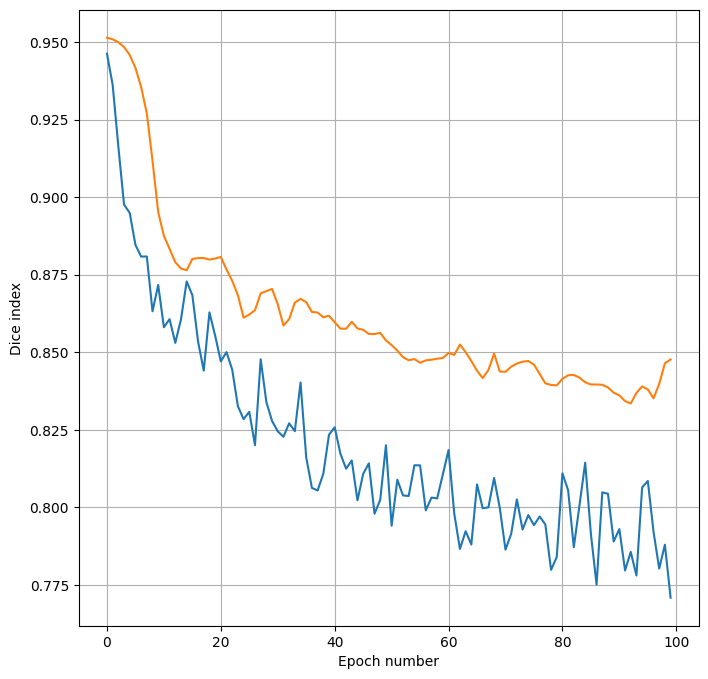

In [12]:
plt.figure(figsize = (8, 8))
plt.plot(train_loss)
plt.plot(val_loss)
plt.grid()

plt.xlabel('Epoch number')
plt.ylabel('Dice index')
plt.show()

In [40]:
import time
t = time.time()
# do stuff
elapsed = time.time() - t
print(elapsed)

0.0


In [19]:
print(img.shape)

torch.Size([3, 384, 544])


C:\Users\Csaba\AppData\Local\Temp\ipykernel_12860\449585325.py:6: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  img_plot = np.array(img).transpose(1, 2, 0)
C:\Users\Csaba\AppData\Local\Temp\ipykernel_12860\449585325.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  mask_plot = np.array(mask).transpose(1, 2, 0)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0..2.0].
C:\Users\Csaba\AppData\Local\Te

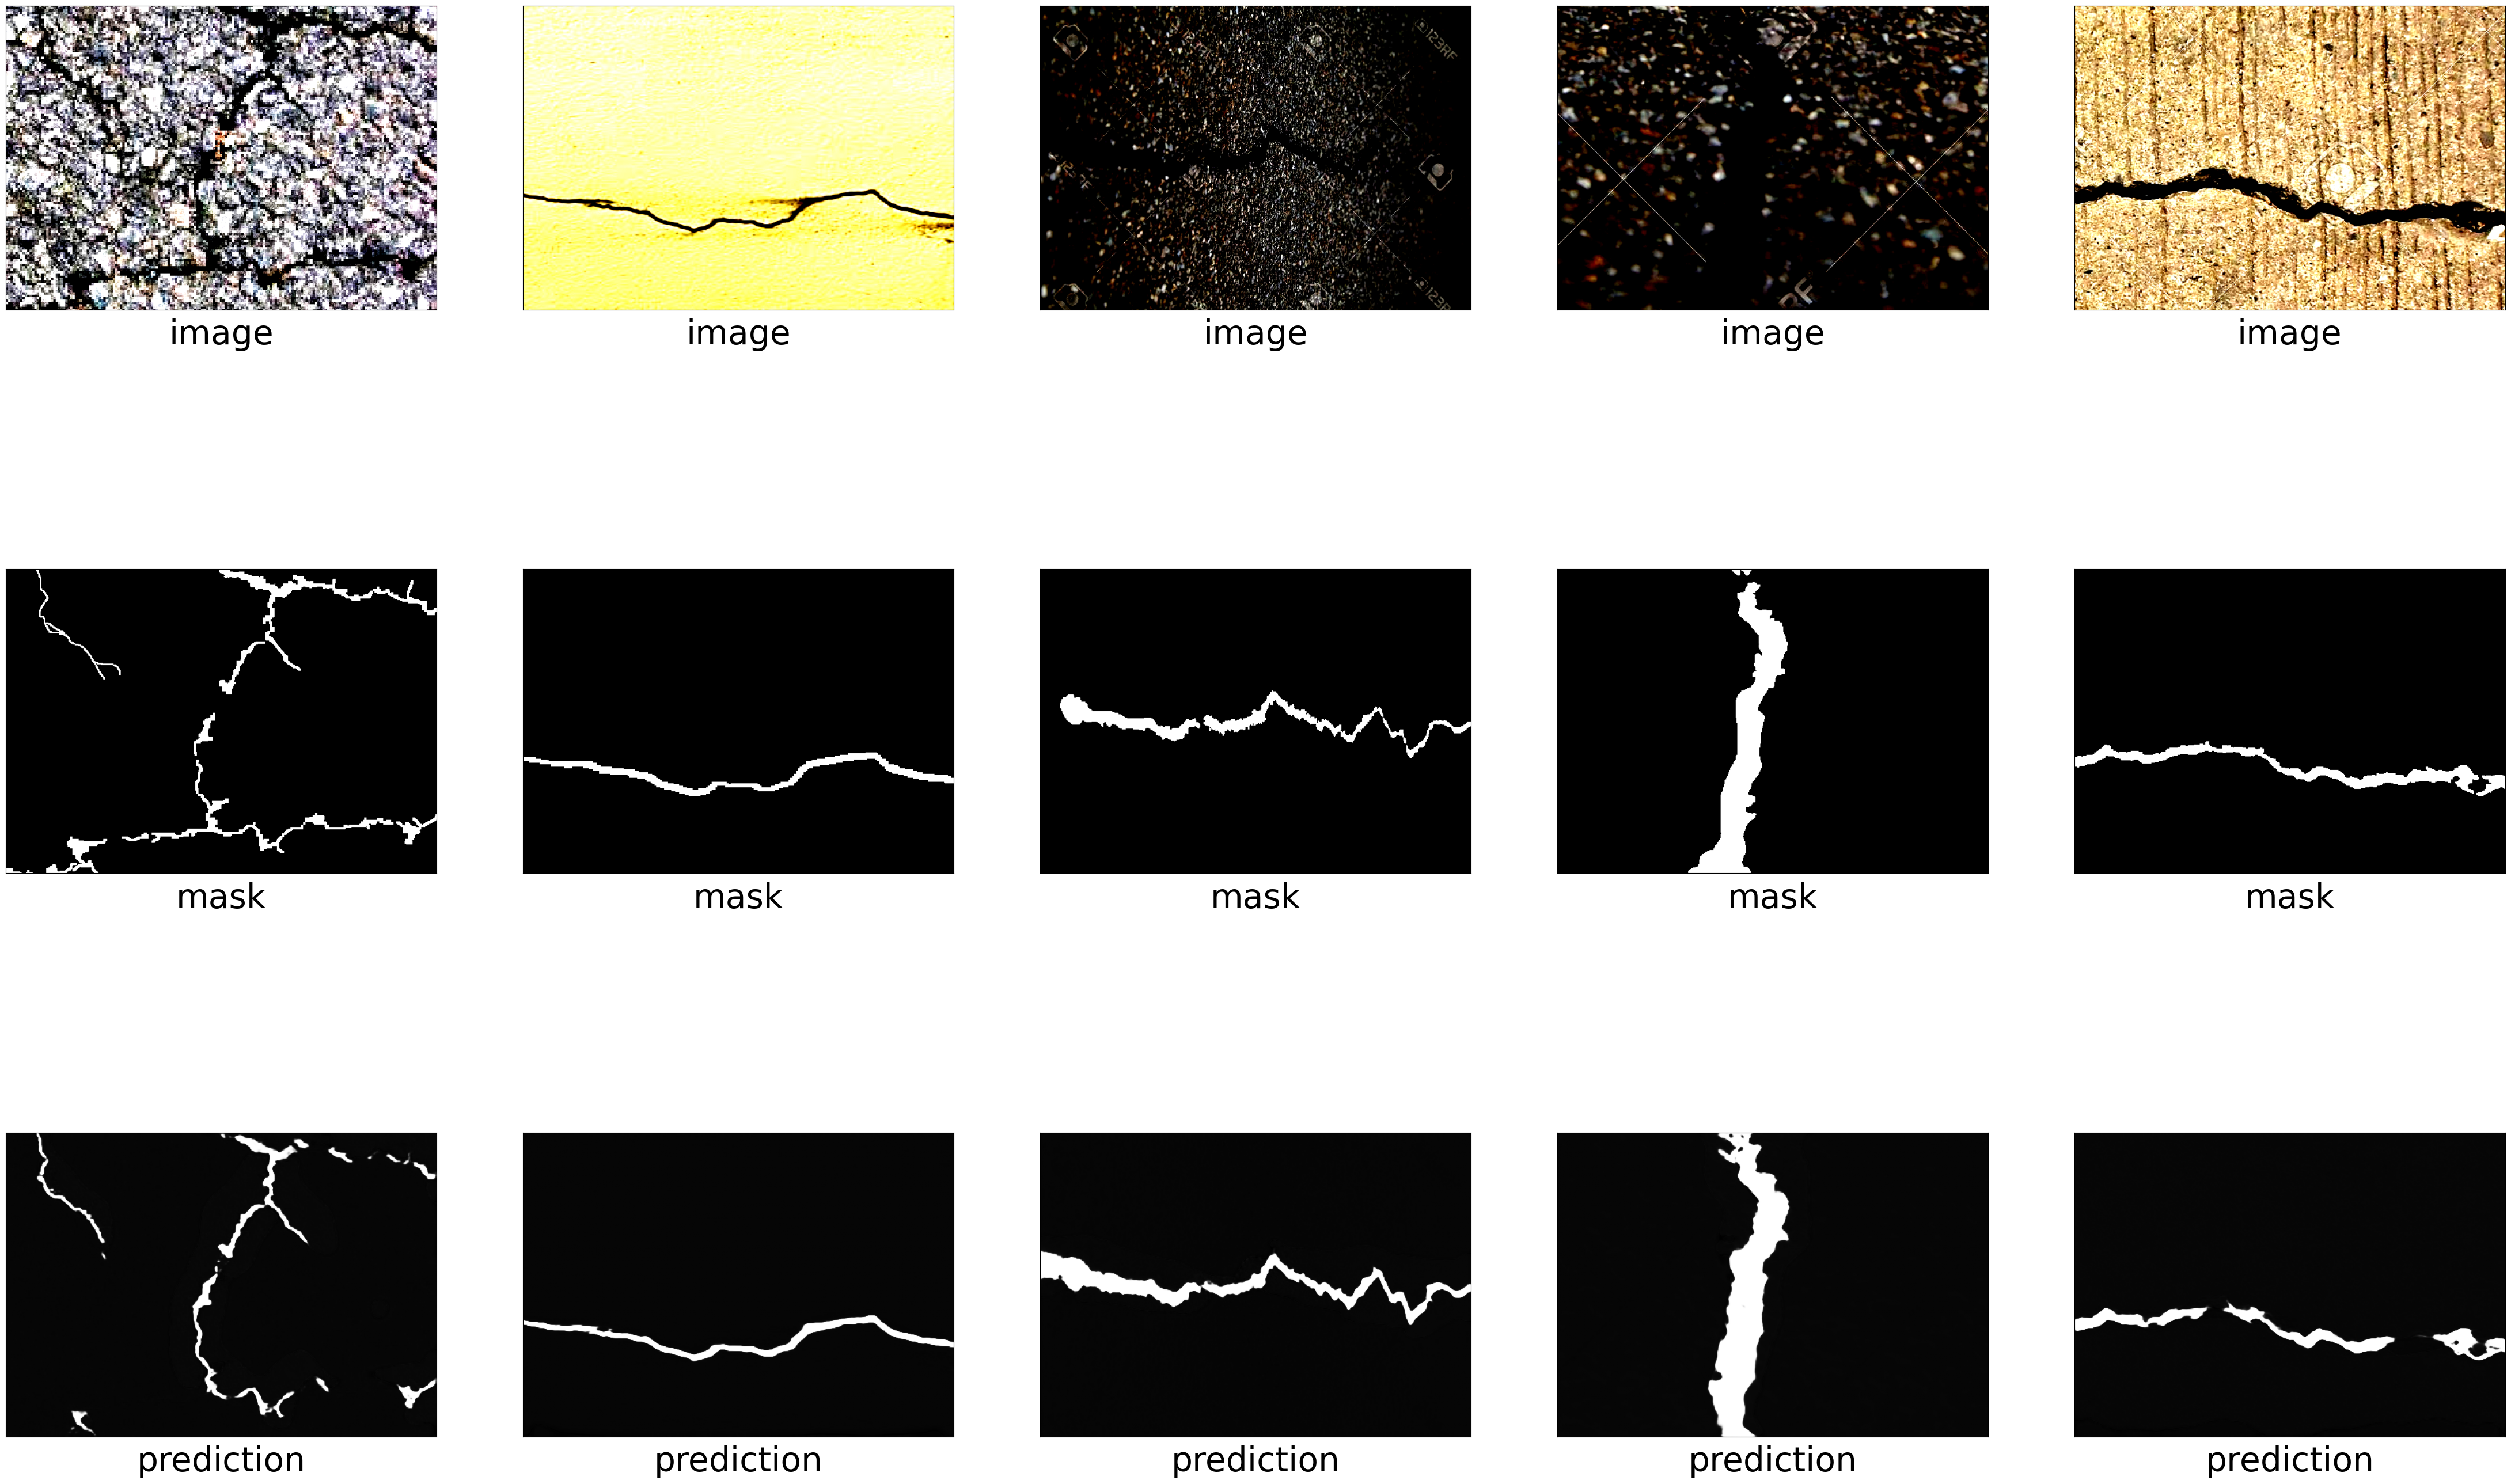

In [22]:
# visualising model predictions
fig = plt.figure(figsize = (56, 36))
for i in range(5):
    img, mask = val_dataset[i].values()

    img_plot = np.array(img).transpose(1, 2, 0)
    mask_plot = np.array(mask).transpose(1, 2, 0)
    subplot = fig.add_subplot(3, 5, i + 1)
    subplot.set_frame_on(True)
    subplot.xaxis.set_ticks_position('none')
    subplot.yaxis.set_ticks_position('none')
    subplot.xaxis.set_ticklabels([])
    subplot.yaxis.set_ticklabels([])
    subplot.xaxis.set_label_text('image', size = 42)
    plt.imshow(img_plot.squeeze())

    subplot = fig.add_subplot(3, 5, i + 6)
    subplot.set_frame_on(True)
    subplot.xaxis.set_ticks_position('none')
    subplot.yaxis.set_ticks_position('none')
    subplot.xaxis.set_ticklabels([])
    subplot.yaxis.set_ticklabels([])
    subplot.xaxis.set_label_text('mask', size = 42)
    plt.imshow(mask_plot.squeeze(), cmap = 'gray')
    #t = time.time()
    with torch.no_grad():
        pred = model(img.to('cuda').reshape((1, *img.shape)))
        #pred = model(img)
    #elapsed = time.time() - t
    #print(elapsed)
    subplot = fig.add_subplot(3, 5, i + 11)
    subplot.set_frame_on(True)
    subplot.xaxis.set_ticks_position('none')
    subplot.yaxis.set_ticks_position('none')
    subplot.xaxis.set_ticklabels([])
    subplot.yaxis.set_ticklabels([])
    subplot.xaxis.set_label_text('prediction', size = 42)
    plt.imshow(pred.cpu().squeeze(), cmap = 'gray')